## Data Wrangling

Using data wrangling techniques to explore the given dataset and produce plots.
The given dataset 'hour.csv' has different columns about the registration status of a bike, type of days (weekdays, weekend or holidays), type of weather conditions and type of dates.

Summary:
- exploring the dataset
- working on rows
- working on columns
- mutating columns
- changing the dataframer into wide, long and tidy format
- plotting
- challenge questions


Loading the necessary libraries.

In [1]:
library(tidyverse)
library(skimr)
library(readr)
library(visdat)
library(kableExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.2”
Warning message:
“package ‘tibble’ was built under R version 4.1.2”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Loading the packages skimr, readr, visdat and kableExtra will make it easier to explain the missing values, if there are any, and the type of columns.

### Exploring the dataset

Performing routine checks about the types of the columns, the missing values, and output a quick summary of the dataset.

In [6]:
bike_df <- read_csv("hour.csv")
summary(bike_df)
spec(bike_df)
bike_df %>% head()

Rows: 17379 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (16): instant, season, yr, mnth, hr, holiday, weekday, workingday, weat...
date  (1): dteday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


    instant          dteday               season            yr        
 Min.   :    1   Min.   :2011-01-01   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   1st Qu.:2011-07-04   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Median :2012-01-02   Median :3.000   Median :1.0000  
 Mean   : 8690   Mean   :2012-01-02   Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034   3rd Qu.:2012-07-02   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379   Max.   :2012-12-31   Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weather

cols(
  instant = col_double(),
  dteday = col_date(format = ""),
  season = col_double(),
  yr = col_double(),
  mnth = col_double(),
  hr = col_double(),
  holiday = col_double(),
  weekday = col_double(),
  workingday = col_double(),
  weathersit = col_double(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_double(),
  registered = col_double(),
  cnt = col_double()
)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [7]:
"2011-01-01" %>% guess_parser()

[1] "date"

The dataframe hour.csv has 17 columns and 17379 rows. 16 columns are type double and one column is type date.
There are no rows with missing values. 

In [8]:
bike_df %>% glimpse()

Rows: 17,379
Columns: 17
$ instant    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …
$ dteday     <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01…
$ season     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ yr         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ mnth       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ hr         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ holiday    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ weekday    <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,…
$ workingday <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ weathersit <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3,…
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0.32,…
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, 0.2…
$ hum        <d

This is just another way of viewing the dataframe in a compact way, or you can say having a 'glimpse' of the datafame.

In [9]:
bike_df %>%
skim()

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Date,dteday,0,1,2011-01-01,2012-12-31,2012-01-02,731,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,instant,0,1,NA,NA,NA,NA,8.690000e+03,5017.0294996,1.00,4345.5000,8690.0000,13034.5000,17379.0000,▇▇▇▇▇
3,numeric,season,0,1,NA,NA,NA,NA,2.501640e+00,1.1069181,1.00,2.0000,3.0000,3.0000,4.0000,▇▇▁▇▇
4,numeric,yr,0,1,NA,NA,NA,NA,5.025606e-01,0.5000078,0.00,0.0000,1.0000,1.0000,1.0000,▇▁▁▁▇
5,numeric,mnth,0,1,NA,NA,NA,NA,6.537775e+00,3.4387757,1.00,4.0000,7.0000,10.0000,12.0000,▇▆▆▅▇
6,numeric,hr,0,1,NA,NA,NA,NA,1.154675e+01,6.9144051,0.00,6.0000,12.0000,18.0000,23.0000,▇▇▆▇▇
7,numeric,holiday,0,1,NA,NA,NA,NA,2.877036e-02,0.1671653,0.00,0.0000,0.0000,0.0000,1.0000,▇▁▁▁▁
8,numeric,weekday,0,1,NA,NA,NA,NA,3.003683e+00,2.0057715,0.00,1.0000,3.0000,5.0000,6.0000,▇▃▃▃▇
9,numeric,workingday,0,1,NA,NA,NA,NA,6.827205e-01,0.4654306,0.00,0.0000,1.0000,1.0000,1.0000,▃▁▁▁▇


── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             17379     
Number of columns          17        
_______________________              
Column type frequency:               
  Date                     1         
  numeric                  16        
________________________             
Group variables            None      

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 dteday                0             1 2011-01-01 2012-12-31 2012-01-02
  n_unique
1      731

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate      mean       sd   p0      p25
 1 instant               0             1 8690      5017.    1    4346.   
 2 season                0             1    2.50      1.11  1       2    
 3 yr                    

Similar as glimpse(), but skim() shows more statistical description and histogram. 
It also shows that there are no missing values.

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


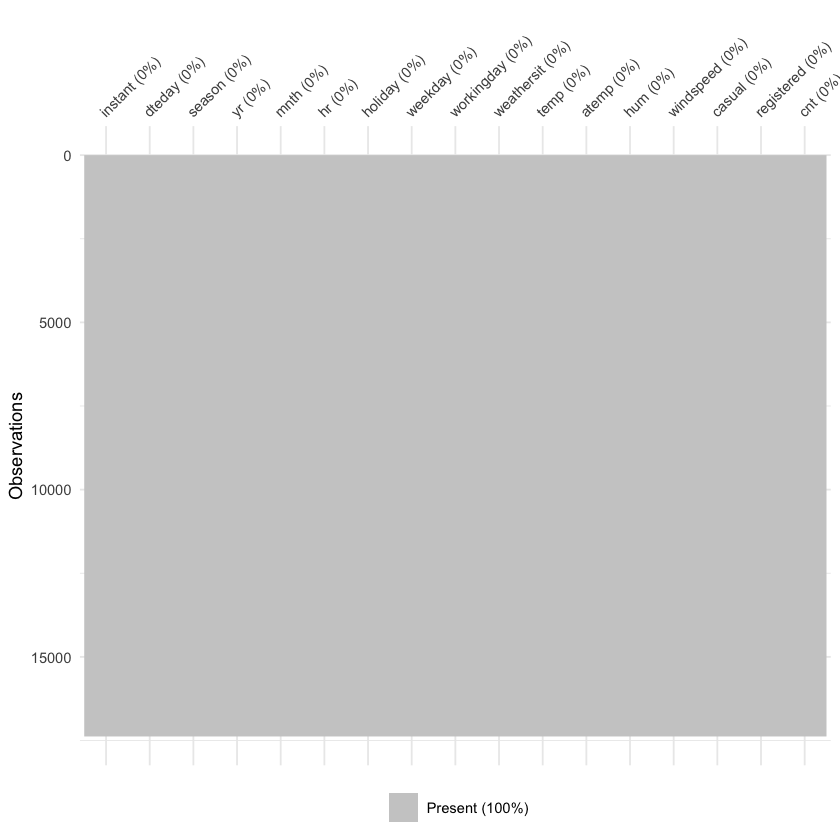

In [11]:
bike_df %>%
  vis_miss()

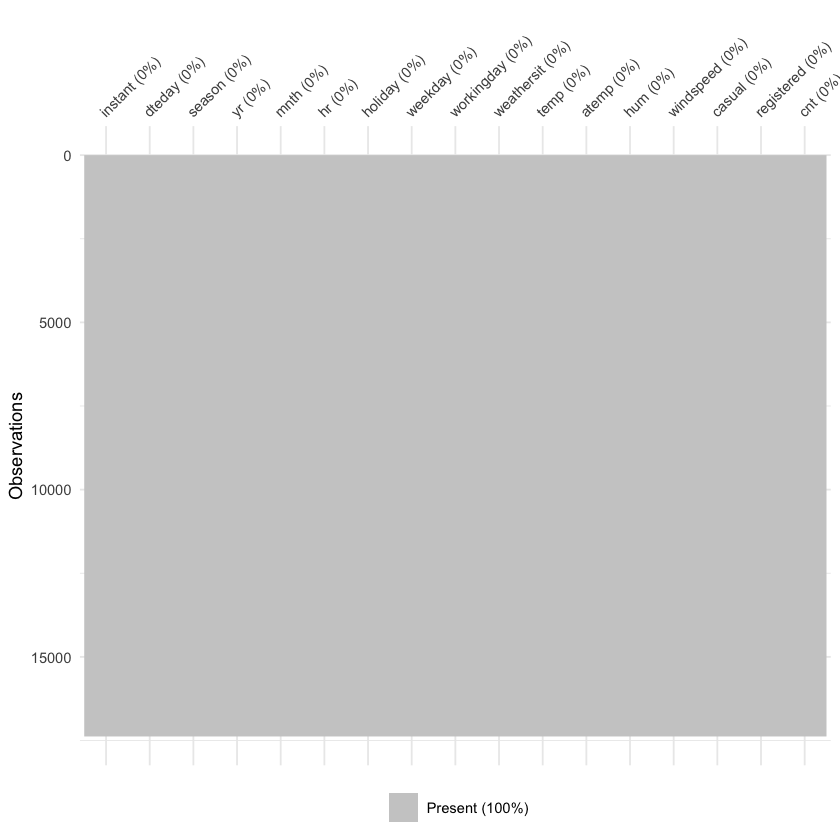

In [12]:
bike_df %>%
  vis_miss(cluster = TRUE)

vis_miss() shows that all values are present. 

### Working on rows

Operating on rows: arranging them, getting the top _n_ according to some variable of your choice, filtering them (eventually using your own functions).

In [13]:
bike_df %>%
slice(3)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32


Takes the dataframe and returns the third row.

In [14]:
bike_df %>%
slice(3:10)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


This returns a slice from the third row to tenth row. 

In [15]:
bike_df %>% 
arrange(desc(temp))

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13164,2012-07-07,3,1,7,16,0,6,0,1,1.00,0.8636,0.19,0.1642,102,192,294
12973,2012-06-29,3,1,6,17,0,5,1,1,0.98,0.9242,0.34,0.1940,82,457,539
4769,2011-07-22,3,0,7,14,0,5,1,1,0.96,1.0000,0.48,0.2985,24,77,101
4935,2011-07-29,3,0,7,12,0,5,1,1,0.96,0.8636,0.31,0.2836,40,95,135
4937,2011-07-29,3,0,7,14,0,5,1,1,0.96,0.8636,0.30,0.2239,34,114,148
4938,2011-07-29,3,0,7,15,0,5,1,1,0.96,0.8636,0.30,0.2537,40,129,169
4939,2011-07-29,3,0,7,16,0,5,1,1,0.96,0.8636,0.30,0.3881,35,198,233
4940,2011-07-29,3,0,7,17,0,5,1,1,0.96,0.8636,0.30,0.2985,47,374,421
12970,2012-06-29,3,1,6,14,0,5,1,1,0.96,0.9091,0.36,0.2239,49,184,233


This displays the dataframe in a descending order based on temperature.

In [16]:
bike_df %>%
arrange(desc(-temp))

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
484,2011-01-22,1,0,1,4,0,6,0,2,0.02,0.0152,0.48,0.2985,0,3,3
485,2011-01-22,1,0,1,6,0,6,0,2,0.02,0.0303,0.44,0.2239,0,2,2
486,2011-01-22,1,0,1,7,0,6,0,1,0.02,0.0152,0.44,0.2836,0,8,8
487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0000,0.44,0.3284,1,26,27
505,2011-01-23,1,0,1,2,0,0,0,1,0.02,0.0606,0.62,0.1343,3,15,18
506,2011-01-23,1,0,1,3,0,0,0,1,0.02,0.0606,0.62,0.1343,1,4,5
529,2011-01-24,1,0,1,4,0,1,1,1,0.02,0.0606,0.48,0.1343,0,1,1
530,2011-01-24,1,0,1,5,0,1,1,1,0.02,0.0606,0.48,0.1343,0,5,5
531,2011-01-24,1,0,1,6,0,1,1,1,0.02,0.0758,0.48,0.0896,0,15,15


Returns the dataframe in ascending order based on temperature.

In [17]:
bike_df %>%
top_n(2, temp)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12973,2012-06-29,3,1,6,17,0,5,1,1,0.98,0.9242,0.34,0.1940,82,457,539
13164,2012-07-07,3,1,7,16,0,6,0,1,1.00,0.8636,0.19,0.1642,102,192,294


Takes the dataframe and return the top 2 rows with the highest temperature. If the column is not specified, then it will order is using the column cnt.

In [18]:
bike_df %>% 
filter(hr == 18)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,9,26,35
42,2011-01-02,1,0,1,18,0,0,0,2,0.36,0.3333,0.46,0.3284,10,43,53
64,2011-01-03,1,0,1,18,0,1,1,1,0.24,0.2576,0.32,0.1045,9,148,157
87,2011-01-04,1,0,1,18,0,2,1,1,0.26,0.2576,0.48,0.1940,3,179,182
110,2011-01-05,1,0,1,18,0,3,1,1,0.24,0.2424,0.38,0.1343,3,166,169
133,2011-01-06,1,0,1,18,0,4,1,1,0.22,0.2273,0.51,0.1343,5,158,163
156,2011-01-07,1,0,1,18,0,5,1,1,0.20,0.2273,0.40,0.0896,7,116,123
180,2011-01-08,1,0,1,18,0,6,0,1,0.14,0.1212,0.39,0.2985,3,52,55
204,2011-01-09,1,0,1,18,0,0,0,1,0.16,0.1364,0.40,0.3284,4,44,48


The filter() method returns the rows that satisfies the condition which is rows with hour equal to 18.

In [19]:
filter_hour <- function(let){
    
    let_length <- length(let)
    result <- vector(mode = "character", length = let_length)
    for (i in 1:let_length){
        testing_element <- let[i]
        if(testing_element == 18){
        result[i] <- "yes"
        }
    }
    return(result)  
}

The filter_hour function iterates through the bike_df and concatenates all the rows with hours equals to 18 as yes. 
In short, returns yes when hour equals 18.

In [20]:
bike_df[[6]] %>% filter_hour()

[1] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
   [13] ""    ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""   
   [25] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
   [37] ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""    ""   
   [49] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
   [61] ""    ""    ""    "yes" ""    ""    ""    ""    ""    ""    ""    ""   
   [73] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
   [85] ""    ""    "yes" ""    ""    ""    ""    ""    ""    ""    ""    ""   
   [97] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [109] ""    "yes" ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [121] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [133] "yes" ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [145] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    "yes"
  [157] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [169] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    "yes"
  [181] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [193] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    "yes"
  [205] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [217] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    "yes"
  [229] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [241] ""    ""    ""    ""    ""    ""    ""    ""    ""    "yes" ""    ""   
  [253] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [265] ""    ""    ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""   
  [277] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [289] ""    ""    ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""   
  [301] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [313] ""    ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""   
  [325] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [337] ""    ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""   
  [349] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [361] ""    ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""   
  [373] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [385] ""    ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""   
  [397] ""    ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""   
  [409] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [421] ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""    ""   
  [433] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [445] ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""    ""   
  [457] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [469] ""    ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""    ""   
  [481] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [493] ""    ""    ""    ""    "yes" ""    ""    ""    ""    ""    ""    ""   
  [505] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [517] ""    ""    ""    "yes" ""    ""    ""    ""    ""    ""    ""    ""   
  [529] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [541] ""    ""    "yes" ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [553] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [565] ""    "yes" ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [577] ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [589] ""    "yes" ""    ""    ""    ""    ""    ""    ""    ""    ""    ""   
  [6

This is what it looks like.

### Working on columns

Selecting some of them, dropping other, renaming them and reordering them.

In [21]:
bike_df %>% select(yr, mnth, hr)

yr,mnth,hr
<dbl>,<dbl>,<dbl>
0,1,0
0,1,1
0,1,2
0,1,3
0,1,4
0,1,5
0,1,6
0,1,7
0,1,8


Only returns the column year, month and hour and the rest is not returned.

In [22]:
bike_df %>% select(-c(yr, mnth, hr))

instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


The column year, month and hour are not returned while the rest are returned.

In [23]:
bike_df %>% select(ends_with("day") & starts_with("week"))

weekday
<dbl>
6
6
6
6
6
6
6
6
6


Only returns the column thats starts with week and ends with day.

In [24]:
bike_df %>% rename(c(year = yr, month = mnth, hour = hr))

instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


Can also use rename() to change the column names to be more obvious. For example, hr into hour, or yr into year.

In [25]:
bike_df[,c(17, 16, 15, 1:14)]

cnt,registered,casual,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,13,3,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
40,32,8,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
32,27,5,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
13,10,3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
1,1,0,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
1,1,0,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896
2,0,2,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2,1,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000
8,7,1,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000


The code above moved the three bottomost columns into the front.

### Mutating columns

Mutate columns to produce new variables (columns) and modify existing one; also operating on the dataframe as a whole and on groups. 

In [26]:
bike_df %>% 
mutate(renter_diff <- registered - casual)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,renter_diff <- registered - casual
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,10
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,24
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,22
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,7
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,-2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,6


mutate() creates a new column in the dataframe. 
In this case, renter_diff is the difference between the number of registered renters and casual renters in a given hour.

In [27]:
bike_df %>%
  group_by(yr) %>%
    summarise(mean_total_count = mean(cnt))

yr,mean_total_count
<dbl>,<dbl>
0,143.7944
1,234.6664


The code above shows that the mean count of bike renters for year 2011 and 2012. 
It is first put in a group by group_by() and each year is calculated for its mean by summarise() then mean().

In [28]:
bike_df %>%
group_by(season) %>%
filter(season == 1) %>%
tally()

season,n
<dbl>,<int>
1,4242


The dataframe is put into groups by season to count the number of rows with season equaling to 1.

### Changing the dataframe into a wide, long and tidy format

Go back and forth between the long and the wide format of a dataframe then produce a tidy version of the dataframe.

In [29]:
bike_df_long <- bike_df %>%
  gather(key = condition,
        value = temp_readings, c(temp, atemp))
bike_df_long

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,condition,temp_readings
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.81,0.0000,3,13,16,temp,0.24
2,2011-01-01,1,0,1,1,0,6,0,1,0.80,0.0000,8,32,40,temp,0.22
3,2011-01-01,1,0,1,2,0,6,0,1,0.80,0.0000,5,27,32,temp,0.22
4,2011-01-01,1,0,1,3,0,6,0,1,0.75,0.0000,3,10,13,temp,0.24
5,2011-01-01,1,0,1,4,0,6,0,1,0.75,0.0000,0,1,1,temp,0.24
6,2011-01-01,1,0,1,5,0,6,0,2,0.75,0.0896,0,1,1,temp,0.24
7,2011-01-01,1,0,1,6,0,6,0,1,0.80,0.0000,2,0,2,temp,0.22
8,2011-01-01,1,0,1,7,0,6,0,1,0.86,0.0000,1,2,3,temp,0.20
9,2011-01-01,1,0,1,8,0,6,0,1,0.75,0.0000,1,7,8,temp,0.24


The dataframe is  turned into a long format. 
The condition column will take in temp and atemp and their corresponding temperature readings is stored in the temp_readings column.
The na.omit() method is not needed here because there is no NA in the dataframe.
However, it is included there for security.

In [30]:
bike_df_wide <- bike_df_long %>% na.omit() %>%
spread(key = condition, value = temp_readings)
bike_df_wide

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,atemp,temp
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.81,0.0000,3,13,16,0.2879,0.24
2,2011-01-01,1,0,1,1,0,6,0,1,0.80,0.0000,8,32,40,0.2727,0.22
3,2011-01-01,1,0,1,2,0,6,0,1,0.80,0.0000,5,27,32,0.2727,0.22
4,2011-01-01,1,0,1,3,0,6,0,1,0.75,0.0000,3,10,13,0.2879,0.24
5,2011-01-01,1,0,1,4,0,6,0,1,0.75,0.0000,0,1,1,0.2879,0.24
6,2011-01-01,1,0,1,5,0,6,0,2,0.75,0.0896,0,1,1,0.2576,0.24
7,2011-01-01,1,0,1,6,0,6,0,1,0.80,0.0000,2,0,2,0.2727,0.22
8,2011-01-01,1,0,1,7,0,6,0,1,0.86,0.0000,1,2,3,0.2576,0.20
9,2011-01-01,1,0,1,8,0,6,0,1,0.75,0.0000,1,7,8,0.2879,0.24


The long dataframe is turned into a wide dataframe, or into its original form. 
So the key (condition) made the columns temp and atemp, and the value for each newly-made columns is from the condition (temp_readings).
Same thing here with na.omit().

In [31]:
tidy_bike_df <- bike_df
tidy_bike_df

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


The dataframe bike_df is already a tidy dataframe because each variable has its own column,
each observation has its own row, each value has its own cell and there is no NA values.

### Plotting

Making sense of the dataset by producing graphical representation of the data via ggplot.

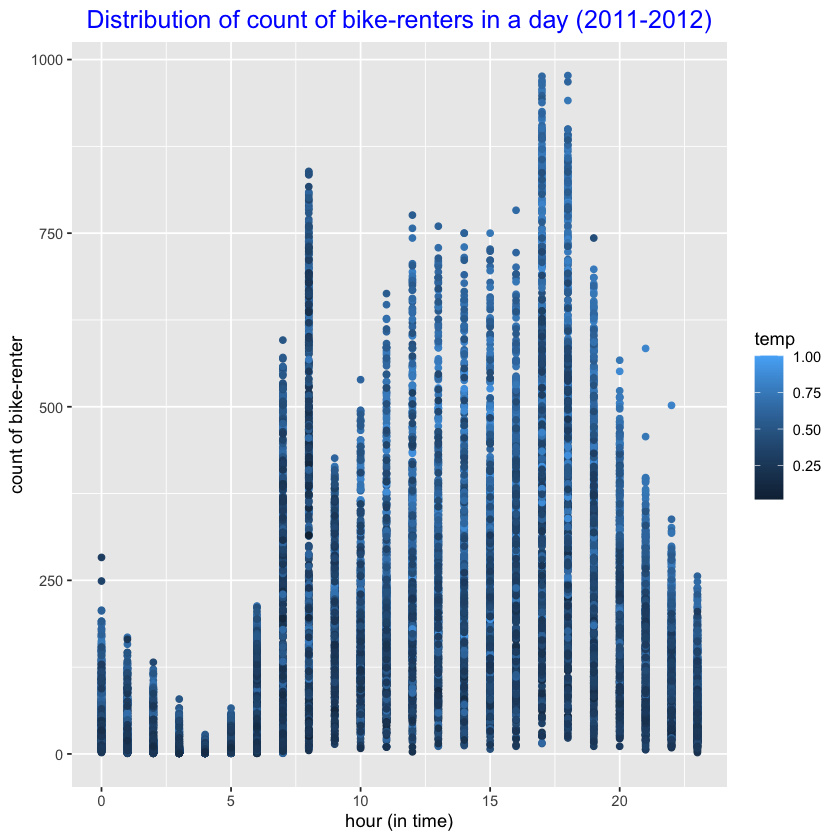

In [32]:
my_point_plot <- bike_df %>% ggplot(mapping = aes(x = hr, y = cnt, colour = temp)) +
geom_point() +
ggtitle("Distribution of count of bike-renters in a day (2011-2012)") +
theme(plot.title = element_text(hjust=0.5, colour = "blue", size = 15)) +
xlab("hour (in time)") +
ylab("count of bike-renter")

my_point_plot

The plot shows the distribution of the number of people who rented a bike at different times in a day (2011 - 2012). 
The dataframe consists of x and y axis displayed as points with variations in colour to show depth. Then, some title and labels for the plot.
For example, the plot suggests that more people are renting bike later in the day with a peak at 5 pm. 

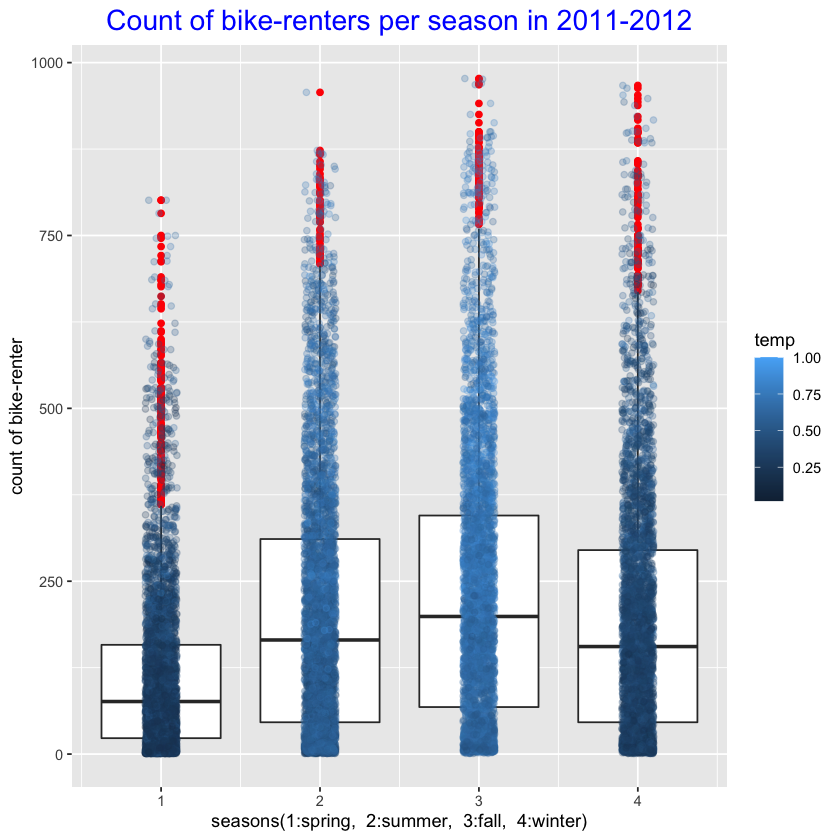

In [33]:
my_box_plot <- bike_df %>% ggplot(aes(x = season, y = cnt, group = season, colour = temp)) + 
geom_boxplot(outlier.colour = "red") +
geom_jitter(position = position_jitter(width=0.1, height = 0), alpha = 1/4) + 
ggtitle("Count of bike-renters per season in 2011-2012") +
theme(plot.title = element_text(hjust=0.5, colour = "blue", size = 17)) +
xlab("seasons(1:spring,  2:summer,  3:fall,  4:winter)") +
ylab("count of bike-renter")

my_box_plot

The plot shows the count of people who rented bikes at different seasons (2011 - 2012). 
The dataframe consists of x and y axis displayed as points and boxplots with variations in colour to show depth. Then, some title and labels for the plot.
The plot suggests that more people are renting bikes at colder seasons.

### Challenge question

You are the data scientist working for a bike rental company. The `hour.csv` is the data you have available. The bike rental CEO sometimes wakes up in the morning with these strange ideas, and you get to test them.

One of the key element for the company is being sure that there are always enough bikes available for the users. So, we need to understand what makes a user rent a bike and what makes a user NOT rent a bike.
Your CEO noticed thinks that one of the peak times for the registered users renting bikes is between 6am and 10am.

Task (1): make a plot to check that (take seasonality into account in the plot).

She also thought about an interesting hypothesis. A registered user usually finish working around 5pm. Between 5pm and 10pm, they notice the weather: in particular, the registered users are sensible to how good the weather is, and how stable it is. The morning after, between 6am and 10am, the amount of registered users renting a bike to go to work depends on the previous afternoon weather.

Task (2): make one or more plot to test this hypothesis (again, consider seasonality in the plot).

### Task (1):

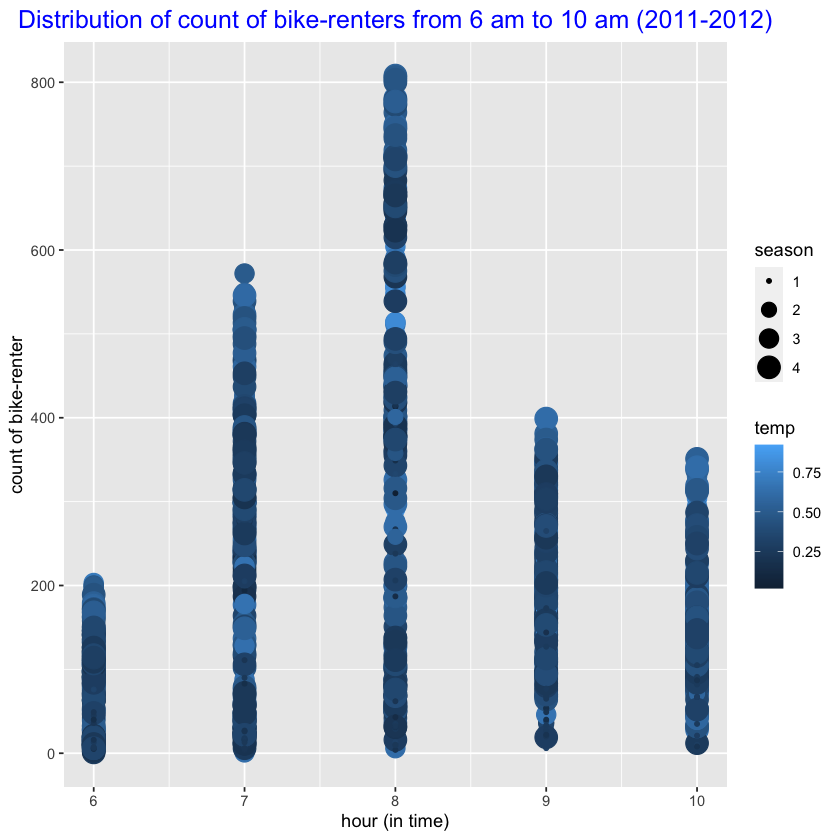

In [38]:
bike_df %>%
filter(hr >= 6, hr<=10) %>%
ggplot(mapping = aes(x = hr, y = registered, colour = temp)) +
geom_point(aes(size=season)) +
ggtitle("Distribution of count of bike-renters from 6 am to 10 am (2011-2012)") +
theme(plot.title = element_text(hjust=0.5, colour = "blue", size = 15)) +
xlab("hour (in time)") +
ylab("count of bike-renter") 

As can be seen above, the plot suggests that there are more registered users renting a bike at 8 am in the morning
and this could be because work usually starts at 8:30 am. With that, less users rent bikes at around 6 and 9 in the morning. 
Also, more users rent bikes when the temperature is low and during colder seasons like winter. 

### Task (2):

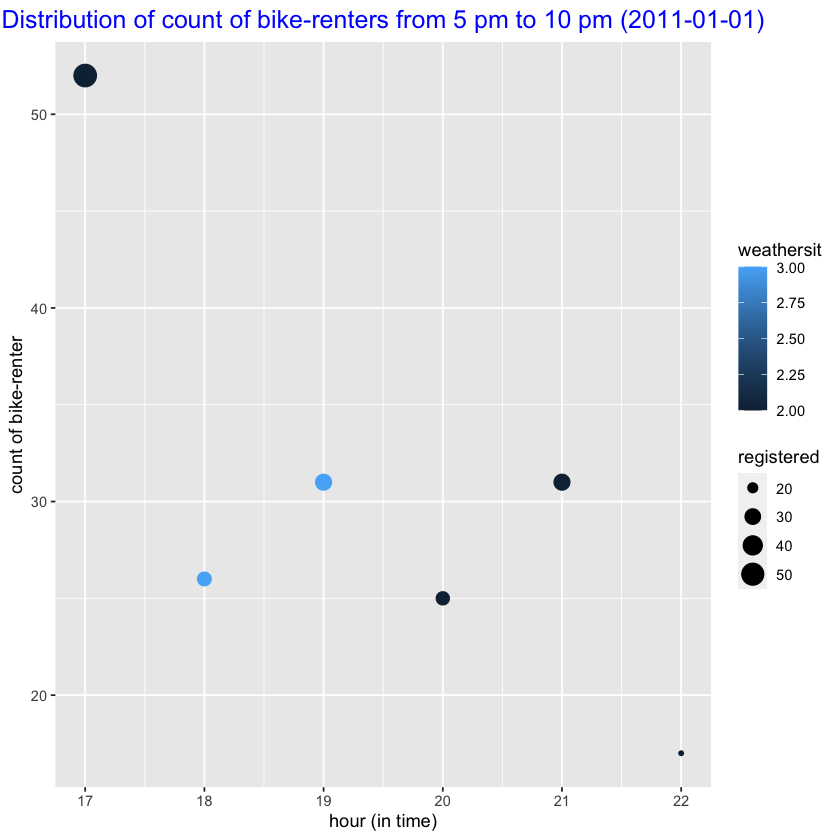

In [39]:
previous_day <- bike_df %>%
filter(hr >= 17, hr <= 22, dteday == "2011-01-01") %>% #filters the dataframe 
ggplot(mapping = aes(x = hr, y = registered)) + #x and y axis
geom_point(aes(size = registered, colour = weathersit)) + #configuring the points
ggtitle("Distribution of count of bike-renters from 5 pm to 10 pm (2011-01-01)") + #titles and labels for clarity
theme(plot.title = element_text(hjust=0.5, colour = "blue", size = 15)) +
xlab("hour (in time)") +
ylab("count of bike-renter")

previous_day

Weathersit:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

The previous_day plot shows that the weather from 5pm to 10pm wasn't so great with a combination of rain, thunder, mist or snow. There was a decrease in the count of bike renters during this time due to bad weather.  

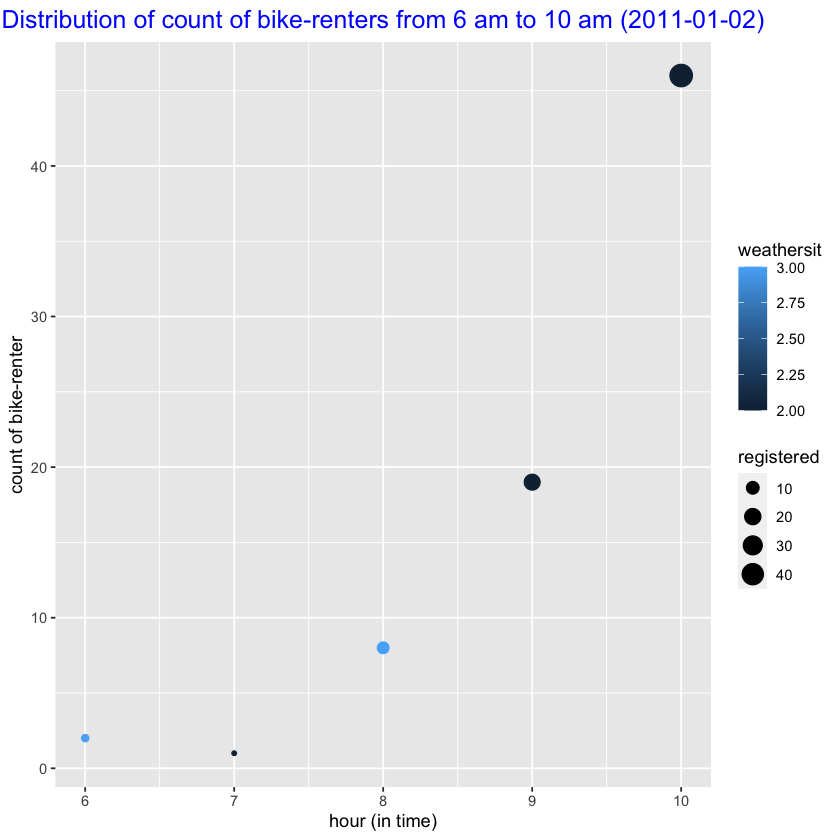

In [40]:
next_day <- bike_df %>%
filter(hr >= 6, hr <= 10, dteday == "2011-01-02") %>% #filters the dataframe
ggplot(mapping = aes(x = hr, y = registered)) + #putting the x and y axis
geom_point(aes(size = registered, colour = weathersit)) + #configuring the point
ggtitle("Distribution of count of bike-renters from 6 am to 10 am (2011-01-02)") + #configuring titles and labels
theme(plot.title = element_text(hjust=0.5, colour = "blue", size = 15)) +
xlab("hour (in time)") +
ylab("count of bike-renter")

next_day

Due to the bad weather last night, there was less people renting bikes the next day.
This is apparent where 8:00 am only has 8 renters when it was expected that there will be more 
as people are going to work at this time. It only went up again at around 10:00 am when the weather became better.
However, the next_plot still supports the concept of "the amount of registered users renting a bike to go to work depends on the previous afternoon weather".